# K-Nearest Neighbors- 

<h4 style="color:dodgerblue">K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method used for classification and regression problems.</h4>

In [145]:
# Let's understand with examples

<img src="images\\KNN_D1.png" alt="image" width="600px">

- For the __point of question(X)__, we are finding 1 nearest neighbor for classfication
- Looking the img above, datapoint with class say __pink__ is closeset to X
- As we are trying to find only 1 neighbor, X will be of class __pink__  

In [148]:
# Diffrent values of K

<div style="display:flex">
<img src="images\\KNN_D3.png" alt="image" width="40%">
<img src="images\\KNN_D4.png" alt="image" width="40%">
</div>

- For __k=3__, model will find 3 closest to __X__ or point of question
- For k=3, as 2 blues and 1 pink nearest points are there, we will go with majority
- Hence for k=3, the point __X__ belongs to class __blue__

____

- Similarly for __k=8__, 5 pinks and 3 blues are there
- Hence for k=8, the point __X__ belongs to class __pink__

In [151]:
# What if there is a tie?

<img src="images\\KNN_D2.png" alt="image" width="600px">

- For __k=2__, we got 2 point of 1 differrent classes, then in this case to which class the point __X__ belongs to?
- So there is no such way to classify based on this scenario
- __We always keep value of k an __Odd values__ in order to avoid this scenario__

<h2 style="color:red">The KNN Algorithm - </h2>

<div style="border:1px solid black;padding:20px">

- **Step_1 ----->** Load the data
- __Step_2 ----->__ __Initialize K__ to your chosen number of neighbors
- __Step_3__ -----> For each example in the data:
  - Calculate the distance between the query example and the current example from the data
  - Add the distance and the index of the example to an ordered collection
- __Step_4__ -----> Sort the ordered collection of distances and indices from smallest to largest by the distances
- __Step_5__ -----> Pick the first K entries from the sorted collection
- __Step_6__ -----> Get the labels of the selected K entries
- __Step_7__ -----> If __regression__, return the __mean of the K labels__
- __Step_8__ -----> If __classification__, return the __mode of the K labels__

</div>

<h2 style="color:red">Example - </h2>

<img src="images\\KNN_D5.png" alt="image" width="400px">

<div style="padding:20px;border:1px solid black">
<img src="images\\KNN_D6.png" alt="image" width="30%">
<img src="images\\KNN_D7.png" alt="image" width="30%">
<img src="images\\KNN_D8.png" alt="image" width="30%">
</div>

<h3 style="color:green">Measuring Similarity with Distance for above example -</h3>

<h4 style="color:slateblue">Locating the tomato's nearest neighbor requires a distance function, or a formula that measures the similarity between two instances</h4>

<div style="background-color:antiquewhite;padding:20px">

<h3>Euclidean Distance - </h3>

- It is specified by the following formula, where __p__ and __q__ are the examples to be compared, each having __n__ features
- The term __p1__ refers to the value of the first feature of example __p__, while __q1__ refers to the value of the first feature
  of example __q__

  <img src="images\\KNN_D9.png" alt="image" width="400px">
    
</div>

<h2 style="color:red">Another Example</h2>

<img src="images\\KNN_D10.png" alt="image" width="600px" border="1px">

- As per the image above, dataset is given
- We have to classify new data having feature values, __maths:9. Science:7__ then what will be the __Result__
- So we have considered __K=3__ for this example
- __Euclidean distances__ are calculated from __new point__ to all __existing data points__
- as k=3, we chose 3 mimimum diatances and check for the count of __each Result classes__ in those 3
- In this example, according to 3 min diatnces i.e. points 1,4 and 1, all have Result as P
- Hence for new Data point __the Result will be Pass(P)__

# Example Code

In [164]:
# KNN Classification - Supervised Machine Learning Algorithm used for both classification and regression
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [165]:
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]

df = pd.read_csv("Datasets\\pima-indians-diabetes.data.csv", names=names)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [166]:
# Splitting into X and y

X = df.iloc[:,:8]
y = df.iloc[:,8]
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [167]:
# Applying min-max scaling mannually

X = (X-X.min())/(X.max()-X.min())
X

,preg,plas,pres,skin,test,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [179]:
# K-fold

num_folds = 10   # defualt = 5 for K-fold

kfold = KFold(n_splits=num_folds)

In [189]:
model = KNeighborsClassifier()   # Default n_neighbors =5
results = cross_val_score(model,X,y,cv=kfold)
results

array([0.66233766, 0.85714286, 0.67532468, 0.7012987 , 0.77922078,
       0.71428571, 0.76623377, 0.83116883, 0.72368421, 0.73684211])

In [201]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [203]:
# as we can see, default neighbors = 5

In [209]:
results.mean()    # 74.47% accuracy

0.7447539302802461

### Grid Search Algorithm for Hyperparameter Tuning

In [213]:
from sklearn.model_selection import GridSearchCV

In [223]:
odd_neighbours = [2*i+1 for i in range(0,20)]
param_grid = dict(n_neighbors=odd_neighbours)
param_grid

{'n_neighbors': [1,
  3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39]}

In [225]:
odd_neighbours

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [229]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39]})

In [231]:
grid.best_params_


{'n_neighbors': 15}

In [233]:
grid.best_score_

0.7643748408454291

In [235]:
# According to Grid Search, k=15 having max accuracy

### Visaulzing CV results

In [240]:
k_range = range(1,41)
k_scores = []

for i in k_range:
    model = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    k_scores.append(scores.mean())

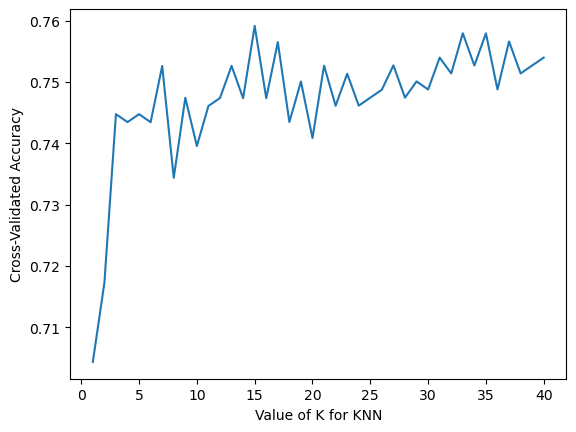

In [244]:
import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [246]:
pd.Series(k_scores).sort_values(ascending=False)

14    0.759125
32    0.757929
34    0.757912
36    0.756596
16    0.756494
39    0.753964
30    0.753964
26    0.752700
38    0.752683
33    0.752666
20    0.752649
12    0.752614
6     0.752597
37    0.751384
31    0.751384
22    0.751333
28    0.750085
18    0.750068
35    0.748770
29    0.748770
25    0.748735
27    0.747437
24    0.747437
8     0.747420
11    0.747386
15    0.747351
13    0.747351
23    0.746138
21    0.746121
10    0.746087
2     0.744754
4     0.744754
17    0.743472
3     0.743455
5     0.743438
19    0.740858
9     0.739559
7     0.734381
1     0.717259
0     0.704392
dtype: float64

In [258]:
# According to this k=14 gives max accuracy

### The results may change if we consider model building on array = df.values rather df, reason is simply way of handling the data.

### If preprocessing is done correctly, we will get identical results